In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
df = pd.read_csv('train.csv')
dft = pd.read_csv('test.csv')
display(df.describe())
display(df.columns)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#df.loc[:,['PassengerId', 'SibSp']].groupby('SibSp').agg('count')
#df.loc[df.isnull().Age,:].groupby('Parch').agg('count')
#df.loc[(df.isnull().Age) & (df.Name.str.contains('"')),:]

#sum(df['noage'])+sum(df['baby'])+sum(df['children'])+sum(df['young'])+sum(df['middle'])+sum(df['old'])
#df.loc[np.logical_not(df.isnull().Cabin),:]
#df['ticketc'] = df.loc[df.Ticket.str.contains(pat='^[A-Z]'), 'Ticket'].str.split().str[0]                                #replace('.', '', regex=False)
#df.loc[df.ticketc.str.contains(pat='S', na=False),['ticketc', 'Embarked']]
#np.mean(df.Fare), np.median(df.Fare), stats.mode(df.Fare)
#df['ticketc'] = df.loc[df.Ticket.str.contains(pat='^[A-Z]'), 'Ticket'].str.split().str[0]                                #replace('.', '', regex=False)
#df.loc[df.Ticket.str.contains(pat='^[A-Z]'), 'Ticket'].str.split().str[1].str.strip().str[:2].unique()
#dft['ticketc'] = dft.loc[dft.Ticket.str.contains(pat='^[A-Z]'), 'Ticket'].str.split().str[1].str.strip()
#dft.loc[dft.isnull().ticketc, 'ticketc'] = dft.loc[dft.isnull().ticketc, 'Ticket']
#display(dft.ticketc.str[0].unique())
#display(df.ticketc.str[0].unique())
#df.loc[df.Name.str.contains('Mrs') & df.isnull().Age, ['Name', 'Sex', 'Age', 'Survived']]
#df.loc[df.Name.str.contains('Mrs') & (df.Age > 14), ['Name', 'Sex', 'Age', 'Parch', 'Survived']].Age.mean()
#df.loc[df.Name.str.contains('Jonkheer'), :]
#df.loc[np.logical_not(df.Name.str.extract('\(([^\)]+)').isnull()[0] & (df.tname != 'Mrs')), 'Name']
#df.loc[df.Name.str.extract('\(([^\)]+)').isnull()[0], 'Name']
df.loc[df.tname != 'Mrs', 'Name'].str.extract('\(([^\)]+)')[0].str.split().str[-1].unique()
df.groupby('Pclass').agg({'Fare': [('quantiles', lambda x: list(np.percentile(x,[0,25,50,75,100],interpolation='nearest')))]})
df.loc[df.Fare==0, ['Name', 'Pclass', 'Age', 'agec']]


In [5]:
df.loc[df.isnull().Cabin, ['PassengerId', 'Cabin']] = 'No'
df['cabinc'] = df.Cabin.str[0]
df.loc[df.isnull().Embarked,'Embarked'] = 'U'
df['agec'] = 'noage'
df.loc[(df.Age <= 3), 'agec'] = 'baby'
df.loc[(df.Age <= 14) & (df.Age > 3), 'agec'] = 'children'
df.loc[df.Name.str.contains('Miss.*"$') & df.isnull().Age, 'agec'] = 'children'
df.loc[df.Name.str.contains('Mr.*"$') & df.isnull().Age, 'agec'] = 'children'
df.loc[df.Name.str.contains('Master') & df.isnull().Age, 'agec'] = 'children'
df.loc[(df.Age <= 45) & (df.Age > 14), 'agec'] = 'young'
df.loc[df.Name.str.contains('Miss') & (df.agec == 'noage'), 'agec'] = 'young'
df.loc[(df.agec=='noage') & ((df.SibSp==1) & (df.Parch==0)), 'agec'] = 'young'
df.loc[(df.Age <= 60) & (df.Age > 45), 'agec'] = 'middle'
df.loc[df.Name.str.contains('Mrs') & (df.agec == 'noage'), 'agec'] = 'middle'
df.loc[(df.Age > 60), 'agec'] = 'old'
#df['ticketc'] = df.loc[df.Ticket.str.contains(pat='^[A-Z]'), 'Ticket'].str.split().str[1].str.strip()
#df.loc[df.isnull().ticketc, 'ticketc'] = df.loc[df.isnull().ticketc, 'Ticket']
#df.loc[df.Ticket.str.contains(pat='Ba'), 'Ticket'] = "54"
#df.ticketc = df.ticketc.str[0]
df['fname'] = df.Name.str.extract('^([^,]+)')[0].str.strip()
df['tname'] = df.Name.str.extract(', ([^.]+)')[0].str.strip()
df.loc[(df.Fare==0) & (df.Pclass==1), 'Fare'] = df.loc[df.Pclass==1, 'Fare'].median()
df.loc[(df.Fare==0) & (df.Pclass==2), 'Fare'] = df.loc[df.Pclass==2, 'Fare'].median()
df.loc[(df.Fare==0) & (df.Pclass==3), 'Fare'] = df.loc[df.Pclass==3, 'Fare'].median()
#display(df.loc[:,['PassengerId', 'Embarked']].groupby('Embarked').agg('count').sort_values(by='Embarked'))
#tmp=df[['Survived', 'agec', 'Sex', 'Pclass']].groupby(['agec', 'Sex', 'Pclass']).agg(['count', 'sum'])
#tmp[('Survived', 'ps')] = tmp[('Survived', 'sum')] / tmp[('Survived', 'count')] * 100
#display(tmp)

In [6]:
dft.loc[df.isnull().Cabin, ['PassengerId', 'Cabin']] = 'No'
dft['cabinc'] = df.Cabin.str[0]
dft.loc[df.isnull().Embarked,'Embarked'] = 'U'
dft['agec'] = 'noage'
dft.loc[(dft.Age <= 3), 'agec'] = 'baby'
dft.loc[(dft.Age <= 14) & (dft.Age > 3), 'agec'] = 'children'
dft.loc[dft.Name.str.contains('Miss.*"$') & dft.isnull().Age, 'agec'] = 'children'
dft.loc[dft.Name.str.contains('Mr.*"$') & dft.isnull().Age, 'agec'] = 'children'
dft.loc[dft.Name.str.contains('Master') & dft.isnull().Age, 'agec'] = 'children'
dft.loc[(dft.Age <= 45) & (dft.Age > 14), 'agec'] = 'young'
dft.loc[dft.Name.str.contains('Miss') & (dft.agec == 'noage'), 'agec'] = 'young'
dft.loc[(dft.agec=='noage') & ((dft.SibSp==1) & (dft.Parch==0)), 'agec'] = 'young'
dft.loc[(dft.Age <= 60) & (dft.Age > 45), 'agec'] = 'middle'
dft.loc[dft.Name.str.contains('Mrs') & (dft.agec == 'noage'), 'agec'] = 'middle'
dft.loc[(dft.Age > 60), 'agec'] = 'old'
dft.loc[dft.isnull().Fare, 'Fare'] = stats.mode(df.Fare).mode[0]
#dft['ticketc'] = dft.loc[dft.Ticket.str.contains(pat='^[A-Z]'), 'Ticket'].str.split().str[1].str.strip()
#dft.loc[dft.isnull().ticketc, 'ticketc'] = dft.loc[dft.isnull().ticketc, 'Ticket']
#dft.ticketc = dft.ticketc.str[0]
dft['fname'] = dft.Name.str.extract('^([^,]+)')[0].str.strip()
dft['tname'] = dft.Name.str.extract(', ([^.]+)')[0].str.strip()


In [7]:
y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "agec", "cabinc", "Embarked", 'Ticket', 'fname', 'tname']
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(dft[features])

# Get missing columns in the training test
missing_cols = set( X.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X.columns]

X['Fare'] = df.Fare
X_test['Fare'] = dft.Fare

In [8]:
model = RandomForestClassifier(n_estimators=10, random_state=200560) #max_features=24, max_depth=16, 

n_ests=[10, 25, 50, 75, 100]
#param_grid = {'n_estimators': [100, 150, 200], 'max_depth': [14, 15, 16], 'max_features': [24, 25, 26]}
param_grid = {'n_estimators': n_ests}

grid_model = GridSearchCV(model, param_grid, scoring='accuracy', return_train_score=True, cv=10)
grid_model.fit(X, y)

display(grid_model.best_estimator_.score(X,y))

display(grid_model.best_params_)

0.9988776655443322

{'n_estimators': 100}

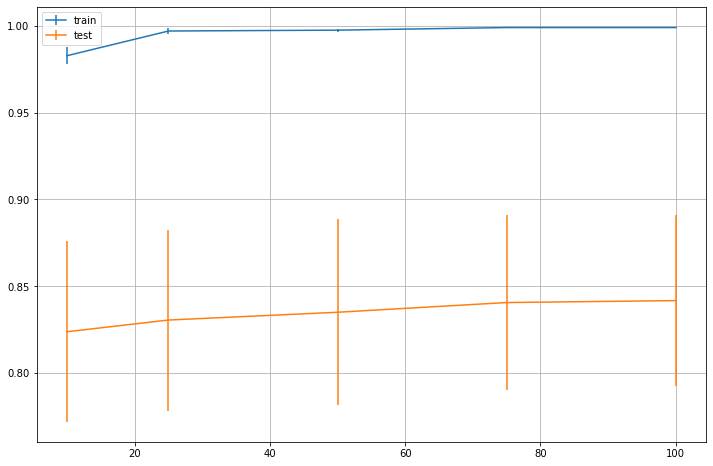

In [9]:
test_scores = grid_model.cv_results_['mean_test_score']
test_error = grid_model.cv_results_['std_test_score'] 
train_scores = grid_model.cv_results_['mean_train_score']
train_error = grid_model.cv_results_['std_train_score'] 
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(x=n_ests, y=train_scores, yerr=train_error, label='train')
ax.errorbar(x=n_ests, y=test_scores, yerr=test_error, label='test')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
RF_model = RandomForestClassifier(n_estimators=75, random_state=200560) #max_features=24, max_depth=16, 

RF_model.fit(X, y)

RF_predictions = RF_model.predict(X_test)
RF_probs = [x[1] for x in RF_model.predict_proba(X_test)]

print(RF_model.score(X, y))
#list(zip(probs,predictions))

#output = pd.DataFrame({'PassengerId': dft.PassengerId, 'Survived': predictions})
#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")

0.9988776655443322


In [11]:
model = SVC(kernel = 'rbf', C=500, gamma='auto', random_state=200560)

Cs=[2000, 1500, 1000, 500, 100, 50, 10, 1]
Gammas=[1/400, 1/500, 1/600, 1/800, 1/1000]
param_grid = {'C': Cs}
#param_grid = {'gamma': Gammas}

grid_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, return_train_score=True)
grid_model.fit(X, y)

display(grid_model.best_estimator_.score(X,y))

display(grid_model.best_params_)

0.9921436588103255

{'C': 500}

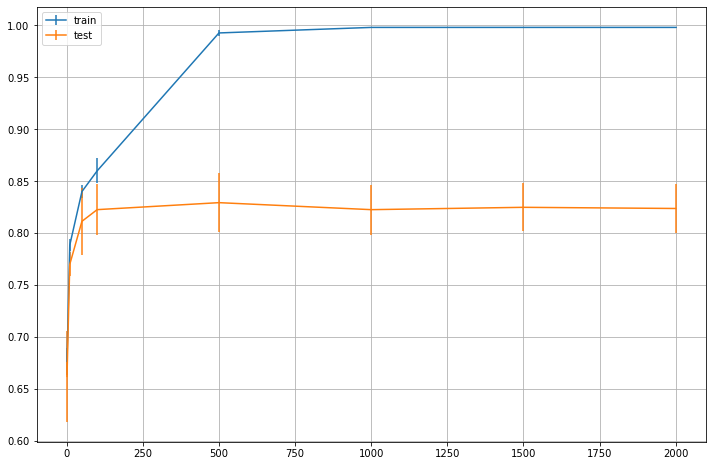

In [12]:
test_scores = grid_model.cv_results_['mean_test_score']
test_error = grid_model.cv_results_['std_test_score'] 
train_scores = grid_model.cv_results_['mean_train_score']
train_error = grid_model.cv_results_['std_train_score'] 
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(x=Cs, y=train_scores, yerr=train_error, label='train')
ax.errorbar(x=Cs, y=test_scores, yerr=test_error, label='test')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
SVC_model = SVC(kernel = 'rbf', C=500, gamma='auto', probability=True, random_state=200560)
SVC_model.fit(X, y)
SVC_predictions = SVC_model.predict(X_test)
display(SVC_model.score(X, y))
SVC_probs = [x[1] for x in SVC_model.predict_proba(X_test)]

0.9921436588103255

In [14]:
predictions = (np.array(SVC_probs) * np.array(RF_probs) * 2 > 0.5).astype(int)
output = pd.DataFrame({'PassengerId': dft.PassengerId, 'Survived': predictions}) 
output.to_csv('my_submission.csv', index=False) 
print("Your submission was successfully saved!")

Your submission was successfully saved!
